# Libraries

In [1]:
from ultralytics import YOLO
from ultralytics import checks
from torchinfo import summary
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import glob
from sklearn.model_selection import train_test_split
import os
import shutil

In [2]:
checks()

Ultralytics YOLOv8.2.78  Python-3.10.8 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)
Setup complete  (12 CPUs, 7.8 GB RAM, 89.9/238.5 GB disk)


# Testing Model

## Detection

In [97]:
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

In [98]:
res = model('bus.jpg')


image 1/1 d:\Projects\Prjct\MyYOLO\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 75.1ms
Speed: 29.8ms preprocess, 75.1ms inference, 55.0ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
res[0].show() #show the result

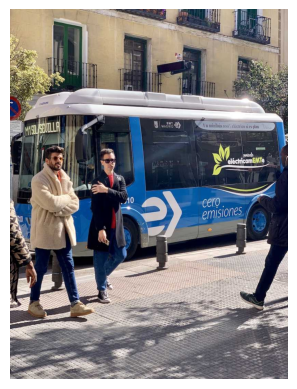

In [24]:
original_image = Image.open('bus.jpg')
plt.imshow(original_image)
plt.axis('off')
plt.show()

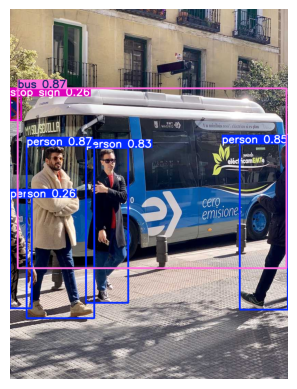

In [40]:
image_with_results = res[0].plot()
plt.imshow(cv2.cvtColor(image_with_results,cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

In [72]:
a = res[0]

## Classification

In [74]:
model = YOLO('yolov8n-cls.pt')

In [75]:
res = model('bus.jpg')


image 1/1 d:\Projects\Prjct\MyYOLO\bus.jpg: 224x224 minibus 0.50, police_van 0.29, trolleybus 0.05, golfcart 0.02, jinrikisha 0.02, 19.0ms
Speed: 15.0ms preprocess, 19.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


In [43]:
res[0].show()

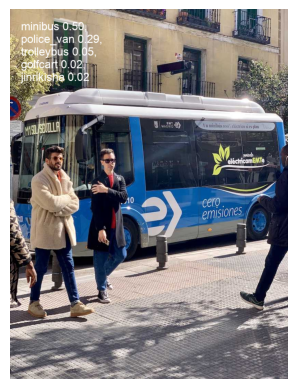

In [44]:
image_with_results = res[0].plot()
plt.imshow(cv2.cvtColor(image_with_results,cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

## Segmentation

In [45]:
model = YOLO('yolov8n-seg.pt')

 Download failure, retrying 1/3 https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8n-seg.pt...
 Download failure, retrying 2/3 https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8n-seg.pt...


In [46]:
res = model('bus.jpg')


image 1/1 d:\Projects\Prjct\MyYOLO\bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 65.2ms
Speed: 6.0ms preprocess, 65.2ms inference, 17.0ms postprocess per image at shape (1, 3, 640, 480)


In [48]:
res[0].show()

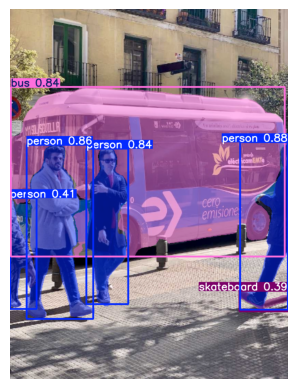

In [47]:
image_with_results = res[0].plot()
plt.imshow(cv2.cvtColor(image_with_results,cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

## Pose

In [49]:
model = YOLO('yolov8n-pose.pt') 

 Download failure, retrying 1/3 https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8n-pose.pt...


In [50]:
res = model('bus.jpg')


image 1/1 d:\Projects\Prjct\MyYOLO\bus.jpg: 640x480 4 persons, 37.5ms
Speed: 6.0ms preprocess, 37.5ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 480)


In [51]:
res[0].show()

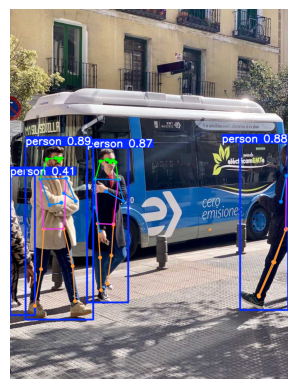

In [52]:
image_with_results = res[0].plot()
plt.imshow(cv2.cvtColor(image_with_results,cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

## Oriented Bounding Boxes (OBB)

In [53]:
model = YOLO('yolov8n-obb.pt')

100%|██████████| 6.26M/6.26M [00:22<00:00, 292kB/s] 


In [54]:
res = model('bus.jpg')


image 1/1 d:\Projects\Prjct\MyYOLO\bus.jpg: 1024x768 63.8ms
Speed: 7.0ms preprocess, 63.8ms inference, 25.0ms postprocess per image at shape (1, 3, 1024, 768)


In [55]:
res[0].show()

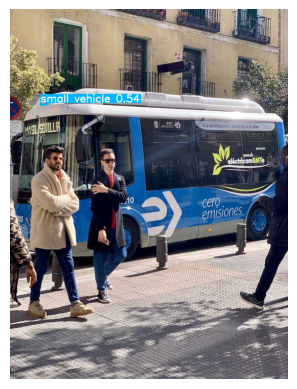

In [56]:
image_with_results = res[0].plot()
plt.imshow(cv2.cvtColor(image_with_results,cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

# Training

In [4]:
model = YOLO('yolov8n.pt')
summary(model)

Layer (type:depth-idx)                                  Param #
YOLO                                                    --
├─DetectionModel: 1-1                                   --
│    └─Sequential: 2-1                                  --
│    │    └─Conv: 3-1                                   (464)
│    │    └─Conv: 3-2                                   (4,672)
│    │    └─C2f: 3-3                                    (7,360)
│    │    └─Conv: 3-4                                   (18,560)
│    │    └─C2f: 3-5                                    (49,664)
│    │    └─Conv: 3-6                                   (73,984)
│    │    └─C2f: 3-7                                    (197,632)
│    │    └─Conv: 3-8                                   (295,424)
│    │    └─C2f: 3-9                                    (460,288)
│    │    └─SPPF: 3-10                                  (164,608)
│    │    └─Upsample: 3-11                              --
│    │    └─Concat: 3-12                           

## Arranging Dataset

In [6]:
names = glob.glob('.\datasets\Pistol Dataset\export\labels\*')
names = ['.'.join(name.split('\\')[-1].split('.')[:-1]) for name in names]

In [7]:
names_t, names_v = train_test_split(names, test_size=0.2, shuffle=True)

In [13]:
images_dir = './datasets/Pistol Dataset/images'
labels_dir = './datasets/Pistol Dataset/labels'
sub_dir = ['train', 'valid', 'test']

In [14]:
for sub in sub_dir:
    os.makedirs(f'{images_dir}/{sub}', exist_ok=True)
    os.makedirs(f'{labels_dir}/{sub}', exist_ok=True)

In [15]:
for name in names_t[:20]:
    source_label = f'./datasets/Pistol Dataset/export/labels/{name}.txt'
    source_image = f'./datasets/Pistol Dataset/export/images/{name}.jpg'
    destination_l = os.path.join(f'{labels_dir}/train/', f'{name}.txt')
    destination_i = os.path.join(f'{images_dir}/train/', f'{name}.jpg')
    shutil.copy2(source_label, destination_l)
    shutil.copy2(source_image, destination_i)

for name in names_v[:5]:
    source_label = f'./datasets/Pistol Dataset/export/labels/{name}.txt'
    source_image = f'./datasets/Pistol Dataset/export/images/{name}.jpg'
    destination_l = os.path.join(f'{labels_dir}/valid/', f'{name}.txt')
    destination_i = os.path.join(f'{images_dir}/valid/', f'{name}.jpg')
    shutil.copy2(source_label, destination_l)
    shutil.copy2(source_image, destination_i)

## Training Process

In [16]:
model.train(data='D:\Projects\Prjct\MyYOLO\datasets\Pistol Dataset\data.yaml', epochs=2)

New https://pypi.org/project/ultralytics/8.2.79 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.78  Python-3.10.8 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./datasets/Pistol Dataset/data.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train20, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

RuntimeError: Dataset 'datasets/Pistol Dataset/data.yaml' error  
Dataset 'datasets/Pistol Dataset/data.yaml' images not found , missing path 'D:\Projects\Prjct\datasets\datasets\Pistol Dataset\images\valid'
Note dataset download directory is 'D:\Projects\Prjct\datasets'. You can update this in 'C:\Users\Alireza\AppData\Roaming\Ultralytics\settings.yaml'